## Data Science Project: Ames Housing Dataset

##### The dataset is retrieved from the Kaggle. The project is intended to predict the house prices based on different feature variables available in the dataset. The project covers Data Cleaning, Explanatory Data Analysis (EDA), Data Modeling, and Machine Learning Model Optimization. 

In [41]:
#Getting started with importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Reading the train dataset from the computer location
train = pd.read_csv('C:/Users/savan/Desktop/DS/Projects/Ames Housing/train_ames.csv')

In [3]:
#Reading the test dataset from the computer location
test = pd.read_csv('C:/Users/savan/Desktop/DS/Projects/Ames Housing/test_ames.csv')

In [4]:
#Looking the first five rows of a train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#looking at the first five rows of a test dataset. This dataset will not have our response variable SalePrice
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#Checking the number of columns and rows of train dataset
train.shape

(1460, 81)

In [7]:
#Checking the number of columns and rows of test dataset
test.shape

(1459, 80)

In [8]:
#Let's check the datatypes of our different features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Let's check how many null values are there in the train
train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

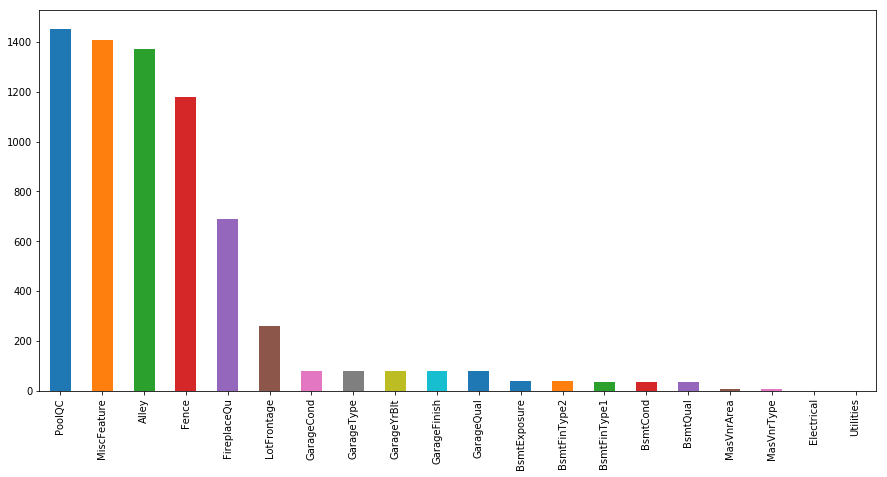

In [7]:
#Visualizing the number of NA values for each of the feature variables
train.isnull().sum().sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (15, 7))

In [8]:
#Let's check what's wrong with PoolQC column
train.PoolQC.value_counts(dropna = False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [9]:
#Checking to see the number of null values in a column and its percentage
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)

In [10]:
#Concating the two columns defined above and calling it
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [11]:
#Let's drop all the rows which are having a null values. These are the features which customer (buyer) usually does not consider-
#- while buying the new house. That is the reason that the dataset does not have much values for those features.
train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','GarageCond', 'GarageType', 
                      'GarageYrBlt', 'GarageFinish', 'GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 
                      'BsmtQual', 'MasVnrArea', 'MasVnrType'], axis = 1, inplace = True)

In [12]:
#Checking the shape of the new dataframe.
train.shape

(1460, 63)

In [13]:
#Checking in at the different values of 'Electrical' column
train.Electrical.value_counts(dropna = False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [14]:
#Dropping the row for which 'Electrical' has the null value
train.drop(index = train[train['Electrical'].isnull() == True].index, axis = 0, inplace=True)

In [15]:
#Again conforming the shape of the train dataframe
train.shape

(1459, 63)

In [16]:
#Checking in the final last time for any null values
train.isnull().sum().max()

0

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaled_saleprice = StandardScaler().fit_transform(train['SalePrice'][:, np.newaxis]);
lower_range = scaled_saleprice[scaled_saleprice[:, 0].argsort()][:10]
higher_range = scaled_saleprice[scaled_saleprice[:, 0].argsort()][-10:]

C:\Users\savan\Anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\savan\Anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
print('Lower Range of the Scaled Saleprice:')
print(lower_range)
print('\n Higher Range of the Scaled Saleprice')
print(higher_range)

Lower Range of the Scaled Saleprice:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

 Higher Range of the Scaled Saleprice
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


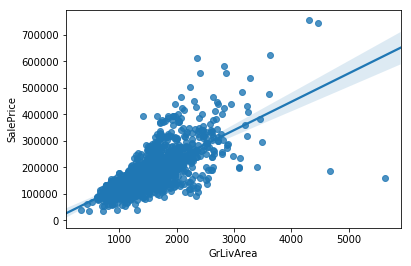

In [20]:
sns.regplot(x = train.GrLivArea, y = train.SalePrice)

In [21]:
train.GrLivArea.sort_values(ascending = False)[:2].index

Int64Index([1298, 523], dtype='int64')

In [22]:
train.drop(index = train.GrLivArea.sort_values(ascending = False)[:2].index, axis = 0, inplace = True)

In [23]:
train.sort_values(by = 'SalePrice', ascending = False)[:2].index

Int64Index([691, 1182], dtype='int64')

In [24]:
train.drop(index = train.sort_values(by = 'SalePrice', ascending = False)[:2].index, axis = 0, inplace = True)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


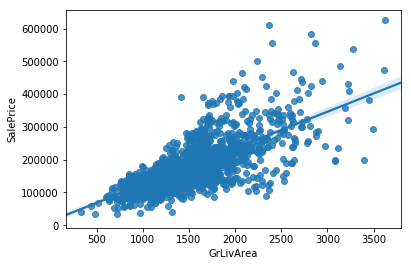

In [25]:
sns.regplot(x = train.GrLivArea, y = train.SalePrice)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


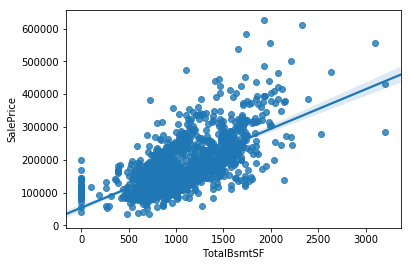

In [26]:
sns.regplot(x = train.TotalBsmtSF, y = train.SalePrice)

In [27]:
from scipy import stats

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


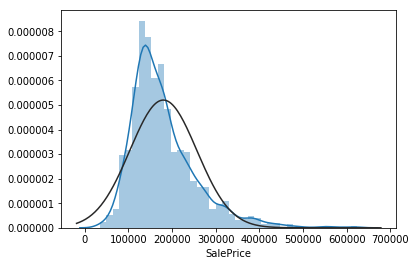

In [28]:
sns.distplot(train.SalePrice, fit = stats.norm)

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 625000], dtype=int64)),
 (72556.07598933189, 180159.9285223368, 0.9441324775480848))

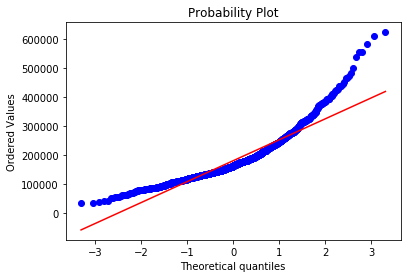

In [29]:
fig = plt.figure()
stats.probplot(train.SalePrice, plot = plt)

In [30]:
train.SalePrice = np.log(train.SalePrice)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


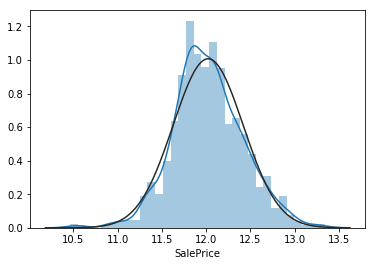

In [31]:
sns.distplot(train.SalePrice, fit = stats.norm)

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.27582754,
         13.32392695, 13.34550693])),
 (0.39528051475807513, 12.021938334385451, 0.9959874416509643))

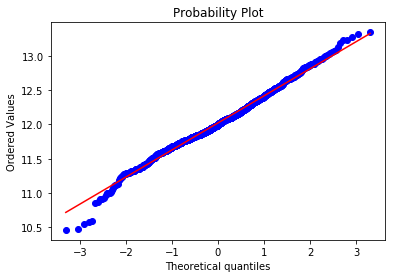

In [32]:
stats.probplot(train.SalePrice, plot=plt)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


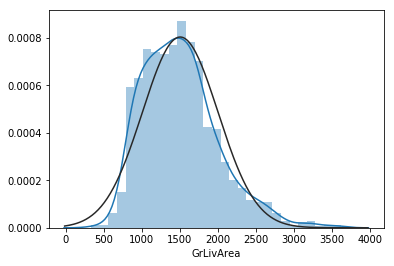

In [33]:
sns.distplot(train.GrLivArea, fit = stats.norm)

In [34]:
train.GrLivArea = np.log(train.GrLivArea)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


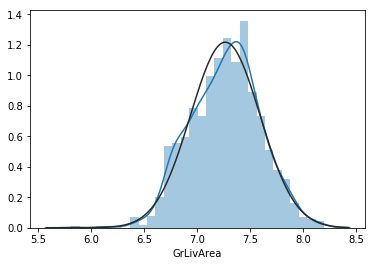

In [34]:
sns.distplot(train.GrLivArea, fit = stats.norm)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


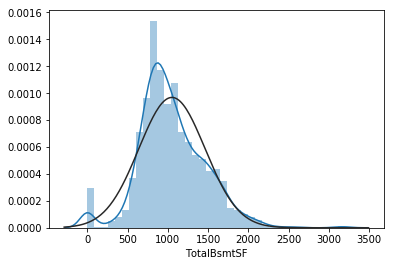

In [35]:
sns.distplot(train.TotalBsmtSF, fit = stats.norm)

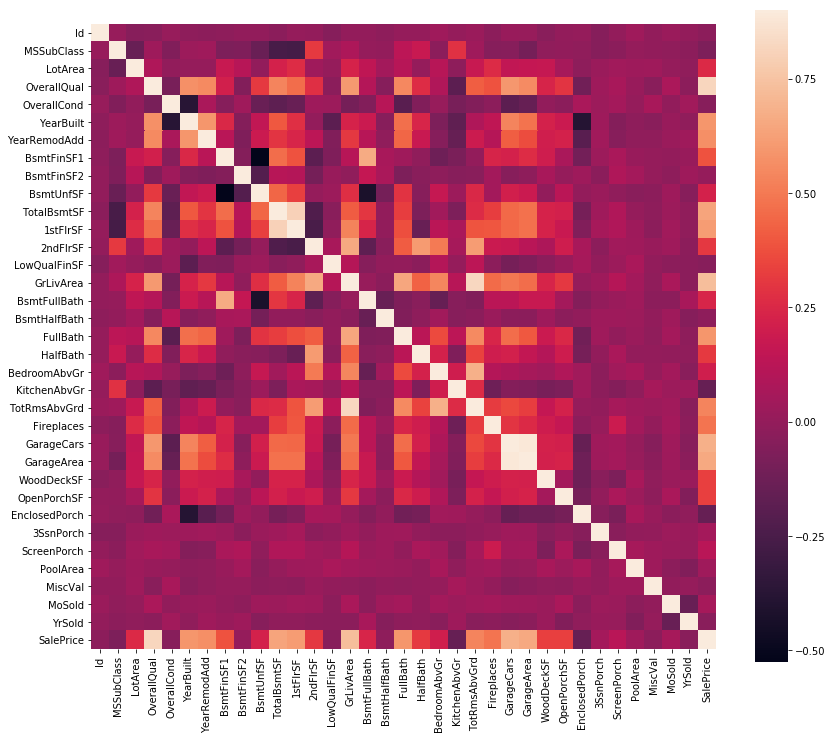

In [36]:
corr = train.corr()
fig = plt.figure(figsize=(14, 12))
sns.heatmap(corr, vmax = 0.9, square=True)

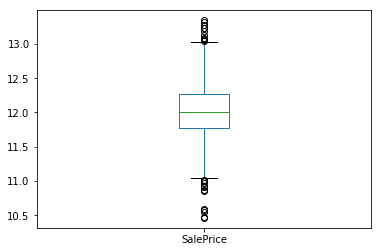

In [37]:
train.SalePrice.plot(kind = 'box')

In [38]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.819428
GrLivArea        0.732808
GarageCars       0.680427
GarageArea       0.655241
TotalBsmtSF      0.642150
1stFlrSF         0.614006
FullBath         0.591039
YearBuilt        0.589233
YearRemodAdd     0.569200
TotRmsAbvGrd     0.533459
Fireplaces       0.487289
BsmtFinSF1       0.382858
WoodDeckSF       0.330573
OpenPorchSF      0.327103
HalfBath         0.311339
2ndFlrSF         0.306647
LotArea          0.258947
BsmtFullBath     0.238915
BsmtUnfSF        0.223266
BedroomAbvGr     0.204117
ScreenPorch      0.123867
MoSold           0.062242
3SsnPorch        0.056067
PoolArea         0.040680
BsmtFinSF2       0.006423
BsmtHalfBath    -0.014971
MiscVal         -0.019751
Id              -0.020546
YrSold          -0.034321
OverallCond     -0.036840
LowQualFinSF    -0.037697
MSSubClass      -0.075097
KitchenAbvGr    -0.147890
EnclosedPorch   -0.148639
Name: SalePrice, dtype: float64

In [53]:
column = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'FullBath', 'SalePrice']

C:\Users\savan\Anaconda3\New folder\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


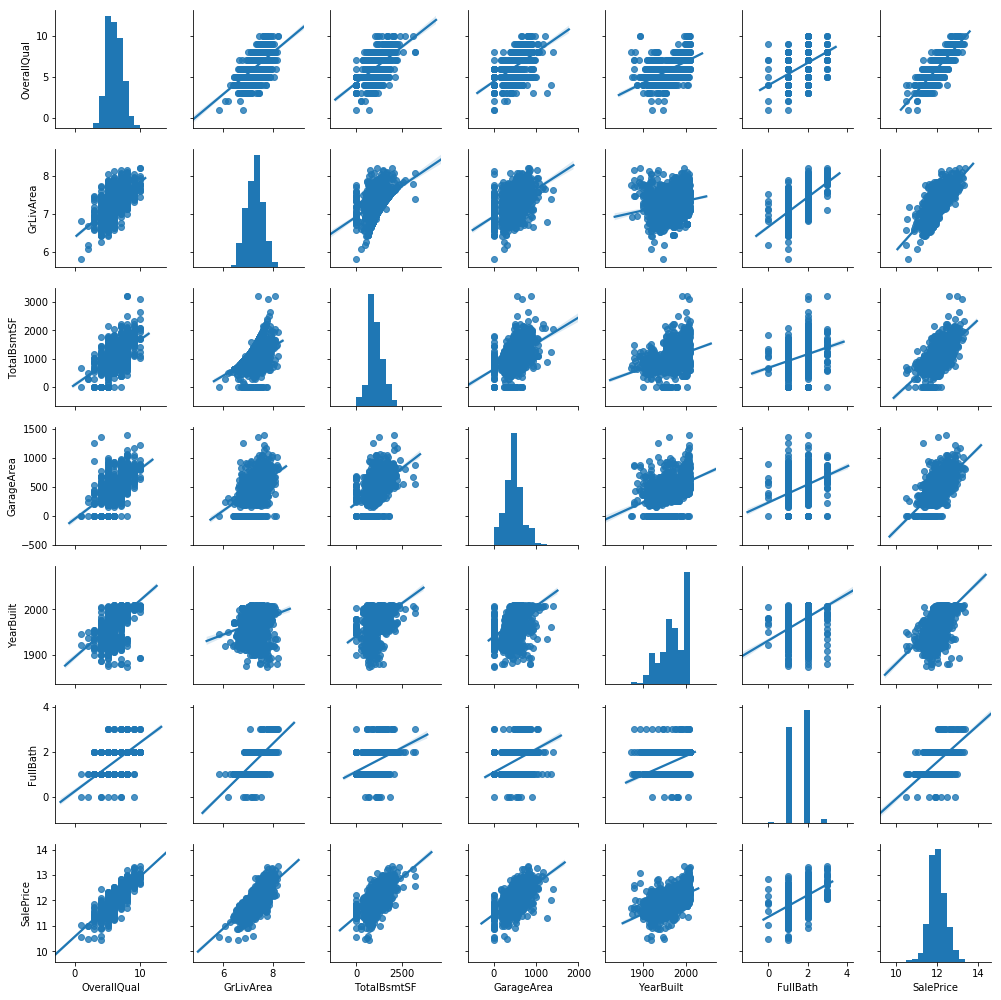

In [40]:
sns.pairplot(train[column], size=2, kind = 'reg')
plt.show()

In [101]:
feature_cols = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'FullBath', 'Fireplaces', '2ndFlrSF']

In [102]:
X = train[feature_cols]
y = train[['SalePrice']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)
models = [LinearRegression()]
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.8498720015993574


In [57]:
ypred = model.predict(X_test)

In [60]:
print('The Mean Absolute Error (MAE) of the model is:', metrics.mean_absolute_error(ypred, y_test))
print('The Mean Squared Error (MSE) of the model is:', metrics.mean_squared_error(ypred, y_test))
print('The Root Mean Square Error (RMSE) of the model is:', np.sqrt(metrics.mean_squared_error(ypred, y_test)))

The Mean Absolute Error (MAE) of the model is: 0.12000010114406502
The Mean Squared Error (MSE) of the model is: 0.02786097295598566
The Root Mean Square Error (RMSE) of the model is: 0.16691606560180378
